## Import required modules from the library

In [2]:
# import opencv library
import cv2

# import numpy for numeric processing
import numpy as np

# import matplotlib for display and plotting
from matplotlib import pyplot as plt


## Read the input image

In [3]:
img = cv2.imread('Lena.tiff')


### Convert BGR to RGB
OpenCV reads a color image in BGR (Blue, Green Red channel images) by default. 
However the imshow() method of matplotlib expects it in RGB (Red, Green, Blue) format.

Therefore, we need to convert the BGR image to RGB image.

## OpenCV Function API

**cv2.cvtColor(src, code[, dst[, dstCn]]) → dst**

Parameters:	

src – input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

dst – output image of the same size and depth as src.

code – color space conversion code (see the description below).

dstCn – number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code .

In [0]:
# Convert BGR to RGB color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spatial Filtering of Images


### Image Smoothing

## OpenCV Function API

**cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst**

Parameters:	
src – input image; it can have any number of channels

dst – output image of the same size and type as src.

ksize – blurring kernel size.

anchor – anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.

borderType – border mode used to extrapolate pixels outside of the image.


#### Smoothing with Averaging Filter 

Lets experiment with different filter sizes.
5x5, 15x15 and 35x35.

In [0]:

# Blur with a 5x5 averaging filter
blur1 = cv2.blur(img,(5,5))

# Blur with a 15x15 averaging filter
blur2 = cv2.blur(img,(15,15))

# Blur with a 35x35 averaging filter
blur3 = cv2.blur(img,(35,35))


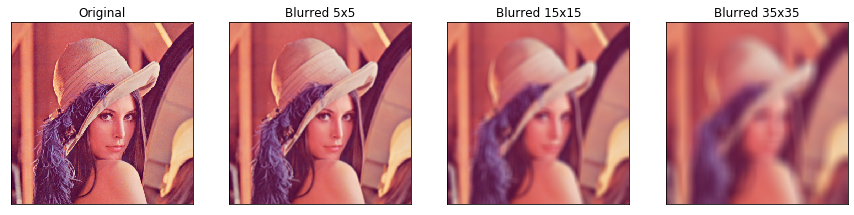

In [5]:
# Set a figure size of the images to be displayed
plt.figure(figsize=(15,10))

# Display the output
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur1),plt.title('Blurred 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blur2),plt.title('Blurred 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blur3),plt.title('Blurred 35x35')
plt.xticks([]), plt.yticks([])

plt.show()

#### Smoothing with a Gaussian Filter

## OpenCV Function API

**cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst**

Parameters:	

src – input image; the image can have any number of channels

dst – output image of the same size and type as src.

ksize – Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero’s and then they are computed from sigma* .

sigmaX – Gaussian kernel standard deviation in X direction.

sigmaY – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are 
computed from ksize.width and ksize.height , respectively (see getGaussianKernel() for details); to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.

borderType – pixel extrapolation method (see borderInterpolate for details).


Lets experiment with different filter sizes.

5x5, 15x15 and 35x35.

In [0]:
# Blur with a 5x5 averaging filter
blur1 = cv2.GaussianBlur(img,(5,5),0)

# Blur with a 15x15 averaging filter
blur2 = cv2.GaussianBlur(img,(15,15),0)

# Blur with a 35x35 averaging filter
blur3 = cv2.GaussianBlur(img,(35,35),0)

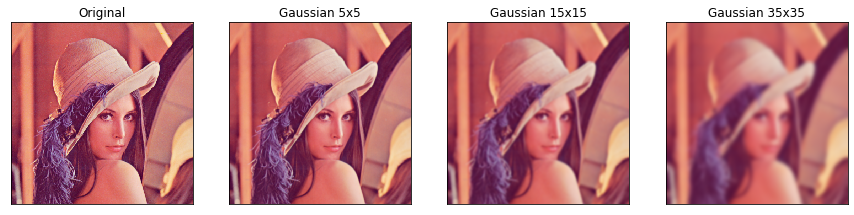

In [7]:
# Set a figure size of the images to be displayed
plt.figure(figsize=(15,10))

# Display the output
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur1),plt.title('Gaussian 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blur2),plt.title('Gaussian 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blur3),plt.title('Gaussian 35x35')
plt.xticks([]), plt.yticks([])

plt.show()

## Median Filtering

## OpenCV Function API

**cv2.medianBlur**(src, ksize[, dst]) → dst

Parameters:	

src – input 1-, 3-, or 4-channel image.

dst – destination array of the same size and type as src.

ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

The function smoothes an image using the median filter.

In [0]:
# Apply a 5x5 median filter
med_img1 = cv2.medianBlur(img, ksize=5)
# Apply a 15x15 median filter
med_img2 = cv2.medianBlur(img, ksize=15)
# Apply a 25x25 median filter
med_img3 = cv2.medianBlur(img, ksize=25)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

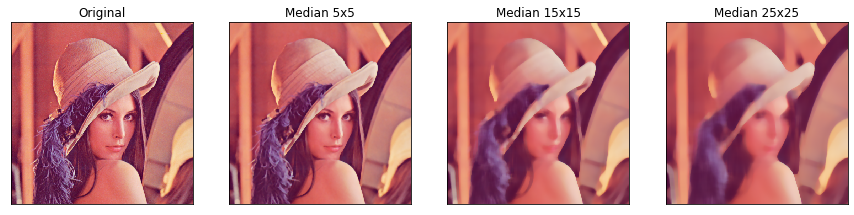

In [9]:
plt.figure(figsize=(15,10))

# Display the output
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(med_img1),plt.title('Median 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(med_img2),plt.title('Median 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(med_img3),plt.title('Median 25x25')
plt.xticks([]), plt.yticks([])

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Color Histogram

## OpenCV Function API

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist**

Parameters:	

images – Source arrays. They all should have the same depth, CV_8U or CV_32F , and the same size. Each of them can have an arbitrary number of channels.

nimages – Number of source images.

channels – List of the dims channels used to compute the histogram. The first array channels are numerated from 0 to images[0].channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].channels()-1, and so on.

mask – Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i] . The non-zero mask elements mark the array elements counted in the histogram.

hist – Output histogram, which is a dense or sparse dims -dimensional array.

dims – Histogram dimensionality that must be positive and not greater than CV_MAX_DIMS (equal to 32 in the current OpenCV version).

histSize – Array of histogram sizes in each dimension.

ranges – Array of the dims arrays of the histogram bin boundaries in each dimension. 

uniform – Flag indicating whether the histogram is uniform or not (see above).

accumulate – Accumulation flag. If it is set, the histogram is not cleared in the beginning when it is allocated. This feature enables you to compute a single histogram from several sets of arrays, or to update the histogram in time.

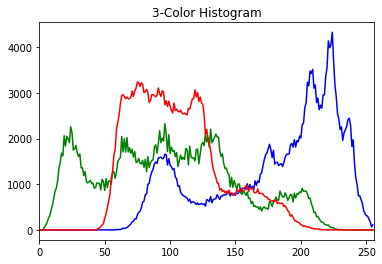

In [10]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('3-Color Histogram')
plt.show()

# Color Space Conversion

### Converting image from RGB to HSV

## OpenCV Function API

**cv2.cvtColor(src, code[, dst[, dstCn]]) → dst**

Parameters:	

src – input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

dst – output image of the same size and depth as src.

code – color space conversion code (see the description below).

dstCn – number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code .

In [0]:
# Convert to HSV color-space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

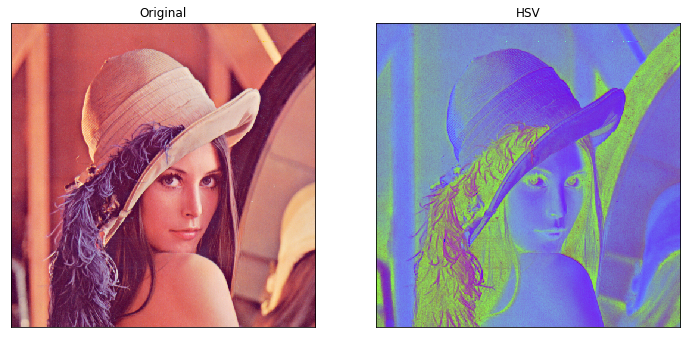

In [12]:
plt.figure(figsize=(12,8))

# Display the output
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(hsv),plt.title('HSV')
plt.xticks([]), plt.yticks([])


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Read and Display an Image as a Gray Scale Image 

(512, 512)


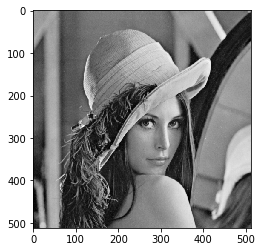

In [13]:
# Read the image as a gray scale image
img1 = cv2.imread('Lena.tiff', 0)

# Dimension of the image
print(img1.shape)

# Display
plt.imshow(img1, cmap='gray')

### OpenCV Histogram

## OpenCV Function API

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.

channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

### Compute Histogram of the Image

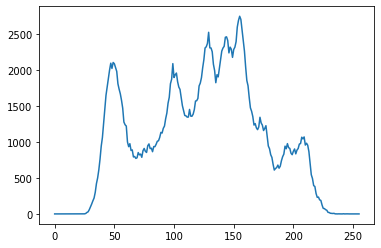

In [14]:
hist_values = cv2.calcHist([img1],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

# Histogram Equalization

## OpenCV Function API

**cv2.equalizeHist(src[, dst]) → dst**

Parameters:	
src – Source 8-bit single channel image.

dst – Destination image of the same size and type as src .


In [0]:
# Histogram Equalization
eq_img = cv2.equalizeHist(img1)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

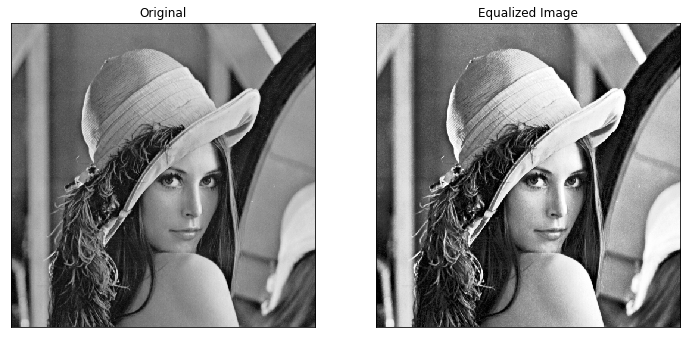

In [16]:
plt.figure(figsize=(12,8))

# Display the output
plt.subplot(121),plt.imshow(img1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(eq_img, cmap='gray'),plt.title('Equalized Image')
plt.xticks([]), plt.yticks([])

## Plot the Histogram of the Images

In [0]:
# calculate frequency of pixels in range 0-255 
his_gray = cv2.calcHist([img1],[0],None,[256],[0,256]) 
hist_eq = cv2.calcHist([eq_img],[0],None,[256],[0,256])  

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9e2a8f59e8>,
 Text(0.5, 1.0, 'Histogram of Equalized Image'))

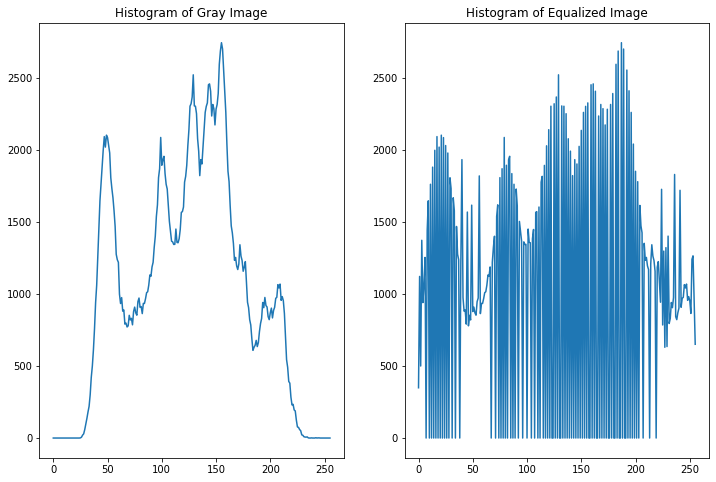

In [34]:
plt.figure(figsize=(12,8))

# Display the output
plt.subplot(121),plt.plot(his_gray),plt.title('Histogram of Gray Image')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(hist_eq),plt.title('Histogram of Equalized Image')
#plt.xticks([]), plt.yticks([])


# Thresholding for Binarization

## OpenCV Function API

**retval, dst	=	cv.threshold(	src, thresh, maxval, type[, dst]	)**

Parameters

src	input array (multiple-channel, 8-bit or 32-bit floating point).

dst	output array of the same size and type and the same number of channels as src.

thresh	threshold value.

maxval	maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type	thresholding type 

In [20]:
threshold, binary_img = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)

print('\n Threshold used for Binarization : %s' %threshold)

print('\n Dimension of the Binary Image : {}'.format(binary_img.shape))



 Threshold used for Binarization : 127.0

 Dimension of the Binary Image : (512, 512)


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

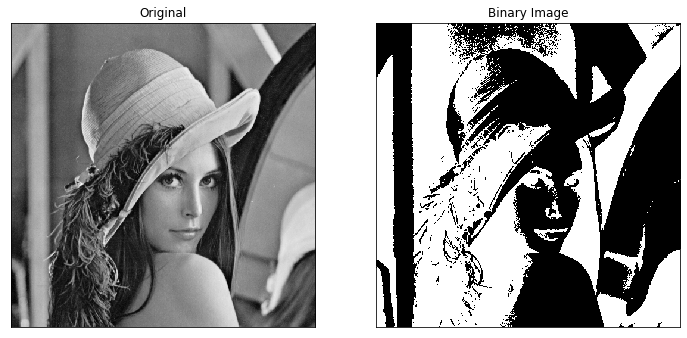

In [36]:
plt.figure(figsize=(12,8))

# Display the output
plt.subplot(121),plt.imshow(img1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(binary_img, cmap='binary'),plt.title('Binary Image')
plt.xticks([]), plt.yticks([])


## Plot the Histogram of the Images

In [0]:
# calculate frequency of pixels in range 0-255 
his_gray = cv2.calcHist([img1],[0],None,[256],[0,256]) 
hist_bin = cv2.calcHist([binary_img],[0],None,[256],[0,256])  

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9e2ae135c0>,
 Text(0.5, 1.0, 'Histogram of Binary Image'))

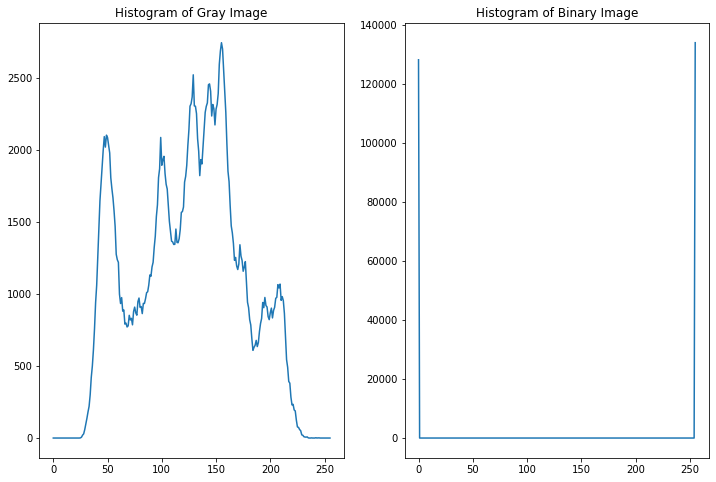

In [37]:
plt.figure(figsize=(12,8))

# Display the output
plt.subplot(121),plt.plot(his_gray),plt.title('Histogram of Gray Image')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(hist_bin),plt.title('Histogram of Binary Image')
#plt.xticks([]), plt.yticks([])


# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```